# 🛸 Momentum - NAG

### Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import random

### Generate Data

In [2]:
data = np.linspace(0, 20, num=50)
np.random.shuffle(data)
data

array([17.95918367, 12.65306122, 10.6122449 , 19.59183673, 15.10204082,
        1.2244898 ,  8.16326531,  6.93877551,  1.63265306,  2.04081633,
        0.        , 11.02040816, 14.69387755,  4.08163265,  5.71428571,
       13.06122449,  3.26530612, 16.32653061,  6.53061224, 10.20408163,
       13.46938776,  7.34693878,  8.97959184,  9.3877551 , 15.91836735,
        4.48979592, 17.55102041, 18.7755102 , 12.24489796,  5.30612245,
        0.40816327, 16.73469388,  7.75510204,  9.79591837,  8.57142857,
        2.44897959, 17.14285714, 20.        , 13.87755102,  0.81632653,
       15.51020408, 11.83673469, 18.36734694,  4.89795918,  6.12244898,
       14.28571429, 11.42857143,  2.85714286,  3.67346939, 19.18367347])

In [3]:
x = data[:]
y = (-2 * x) + 1

## Momentum

In [4]:
def Momentum(x, y, alpha, gamma, epochs):
    
    last_updated_theta0 = 0
    last_updated_theta1 = 0

    m = len(x) 
    all_loss = []
    theta0, theta1 = 0, 0

    for i in range(epochs):
        y_hat  = theta0 + theta1 * x

        loss = sum( np.square(y_hat - y) ) /(2*m)

        # Add previous thetas and loss 
        all_loss.append(loss)
        
        # Gradient thetas
        g_theta0 = sum(y_hat - y) / m
        g_theta1 = sum((y_hat - y) * x) / m
        
        # used updated thetas to learn from the history 
        updated_theta0 = gamma * last_updated_theta0 + (alpha * g_theta0)
        updated_theta1 = gamma * last_updated_theta1 + (alpha * g_theta1) 

        # Update thetas using the updated version of them
        theta0 = theta0 - updated_theta0
        theta1 = theta1 - updated_theta1


        # Update the last updated thetas for the next iteration
        last_updated_theta0, last_updated_theta1 = updated_theta0, updated_theta1

        
        
        # Stopping using gradient
        if np.linalg.norm([updated_theta0, updated_theta1]) < 0.01:
            break
        
#         # Stopping using loss
#         if (i > 0) and (all_loss[i-1] - all_loss[i]) < 0.0001:
#             break
        
#         # Stopping using theta
#         if (i > 0) and ( ( np.linalg.norm([all_theta0[i], all_theta1[i]]) 
#                             - np.linalg.norm([all_theta0[i-1], all_theta1[i-1]])) < 0.00001):
#             break
    
    print(f"After {i+1} Iterations\n")
    print(f"updated_theta0: {updated_theta0}")
    print(f"updated_theta1: {updated_theta1}")
    print(f"loss: {loss}\n")
    print(f"Y_Hat: \n{y_hat}\n")
    print(f"Y: \n{y}")

    return (all_loss, y_hat, loss, i)

all_loss, y_hat, loss, num_iterations \
= Momentum(x,y, 0.001, 0.6, 250)


After 17 Iterations

updated_theta0: -0.0013175009931727345
updated_theta1: -0.007905715854076836
loss: 0.166244256870748

Y_Hat: 
[-34.46103338 -24.31823375 -20.41715697 -37.58189481 -28.99952589
  -2.47220378 -15.73586483 -13.39521876  -3.25241913  -4.03263449
  -0.13155771 -21.19737233 -28.21931053  -7.93371127 -11.0545727
 -25.09844911  -6.37328056 -31.34017196 -12.61500341 -19.63694161
 -25.87866447 -14.17543412 -17.29629555 -18.0765109  -30.5599566
  -8.71392663 -33.68081803 -36.0214641  -23.5380184  -10.27435734
  -0.91177306 -32.12038732 -14.95564948 -18.85672626 -16.51608019
  -4.81284984 -32.90060267 -38.36211017 -26.65887982  -1.69198842
 -29.77974125 -22.75780304 -35.24124874  -9.49414198 -11.83478805
 -27.43909518 -21.97758768  -5.5930652   -7.15349591 -36.80167945]

Y: 
[-34.91836735 -24.30612245 -20.2244898  -38.18367347 -29.20408163
  -1.44897959 -15.32653061 -12.87755102  -2.26530612  -3.08163265
   1.         -21.04081633 -28.3877551   -7.16326531 -10.42857143
 -25.12

In [5]:
# Score
r2_score(y, y_hat)

0.9976041268862745

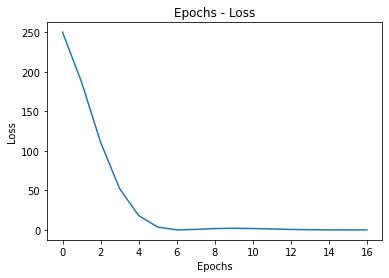

In [6]:
# epochs - loss
plt.plot(all_loss)
plt.title('Epochs - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## NAG - Nesterov Accelerated Gradient

In [7]:
def NAG(x, y, alpha, gamma, epochs):
    
    last_updated_theta0 = 0
    last_updated_theta1 = 0

    m = len(x) 
    all_loss = []
    theta0, theta1 = 0, 0

    for i in range(epochs):
        y_hat  = theta0 + theta1 * x

        loss = sum( np.square(y_hat - y) ) /(2*m)

        # Add previous thetas and loss 
        all_loss.append(loss)

        # calculate updated thetas first without the added gradient 
        # Note: use just the history
        updated_theta0 = gamma * last_updated_theta0
        updated_theta1 = gamma * last_updated_theta1
        
        # Gradient thetas
        g_theta0 = sum(y_hat - y) / m
        g_theta1 = sum((y_hat - y) * x) / m
        
        # calculate gradient first based on the updated thetas : Look First
        gradient_theta0 = ( alpha * g_theta0) - updated_theta0
        gradient_theta1 = ( alpha * g_theta1) - updated_theta1
        
        # used updated gradients to update theta
        updated_theta0 = gamma * last_updated_theta0 + gradient_theta0
        updated_theta1 = gamma * last_updated_theta1 + gradient_theta1
        
        
        # Update thetas using the updated version of them
        theta0 = theta0 - updated_theta0
        theta1 = theta1 - updated_theta1
        
        # Update the last updated thetas for the next iteration
        last_updated_theta0, last_updated_theta1 = updated_theta0, updated_theta1
        

        # Stopping using gradient
        if np.linalg.norm([updated_theta0, updated_theta1]) < 0.01:
            break
        
#         # Stopping using loss
#         if (i > 0) and (all_loss[i-1] - all_loss[i]) < 0.00001:
#             break
        
#         # Stopping using theta
#         if (i > 0) and ( ( np.linalg.norm([all_theta0[i], all_theta1[i]]) 
#                             - np.linalg.norm([all_theta0[i-1], all_theta1[i-1]])) < 0.00001):
#             break
    
    print(f"After {i+1} Iterations\n")
    print(f"updated_theta0: {updated_theta0}")
    print(f"updated_theta1: {updated_theta1}")
    print(f"loss: {loss}\n")
    print(f"Y_Hat: \n{y_hat}\n")
    print(f"Y: \n{y}")

    return (all_loss, y_hat, loss, i)

all_loss, y_hat, loss, num_iterations \
= NAG(x,y, 0.001, 0.9, 500)


After 24 Iterations

updated_theta0: 0.00038781365893250663
updated_theta1: 0.009146529577630975
loss: 0.4752121491691662

Y_Hat: 
[-33.32192236 -23.51543168 -19.7437045  -36.3393041  -28.0415043
  -2.39375945 -15.21763188 -12.95459557  -3.14810489  -3.90245033
  -0.13072314 -20.49804993 -27.28715886  -7.67417751 -10.69155926
 -24.26977712  -6.16548664 -30.30454061 -12.20025013 -18.98935906
 -25.02412255 -13.708941   -16.72632275 -17.48066819 -29.55019517
  -8.42852295 -32.56757692 -34.83061323 -22.76108624  -9.93721382
  -0.88506858 -31.05888605 -14.46328644 -18.23501362 -15.97197731
  -4.65679576 -31.81323148 -37.09364954 -25.77846799  -1.63941402
 -28.79584974 -22.00674081 -34.07626779  -9.18286838 -11.44590469
 -26.53281343 -21.25239537  -5.4111412   -6.91983207 -35.58495867]

Y: 
[-34.91836735 -24.30612245 -20.2244898  -38.18367347 -29.20408163
  -1.44897959 -15.32653061 -12.87755102  -2.26530612  -3.08163265
   1.         -21.04081633 -28.3877551   -7.16326531 -10.42857143
 -25.1

In [8]:
# Score
r2_score(y, y_hat)

0.9931513543207973

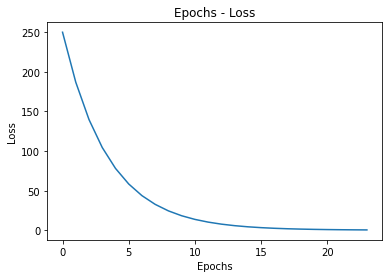

In [9]:
# epochs - loss
plt.plot(all_loss)
plt.title('Epochs - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()